# Logistic Regression

- Logistic regression is one of the most popular  Supervised  Machine Learning algorithms, It is used for predicting the categorical dependent variable using a given set of independent variables.

- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
- In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

- Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:


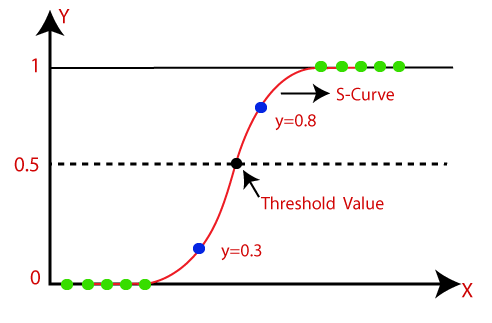

Note: Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

### Logistic Function (Sigmoid Function):
- The sigmoid function is a mathematical function used to map the predicted values to probabilities.
    It maps any real value into another value within a range of 0 and 1.
- The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.
- In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.


### Assumptions for Logistic Regression:
- The dependent variable must be categorical in nature.
- The independent variable should not have multi-collinearity.


### Logistic Regression Equation:
- The Logistic regression equation can be obtained from the Linear Regression equation. The mathematical steps to get Logistic Regression equations are given below:

    We know the equation of the straight line can be written as:


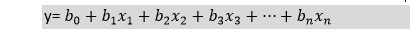

In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):

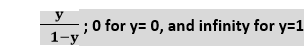
- But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:

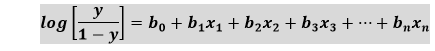
- The above equation is the final equation for Logistic Regression.

### Type of Logistic Regression:

- On the basis of the categories, Logistic Regression can be classified into three types:
- Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.
- Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
- Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".


### Steps in Logistic Regression:
- Data Pre-processing step
- Fitting Logistic Regression to the Training set
- Predicting the test result
- Test accuracy of the result(Creation of Confusion matrix)
-  Visualizing the test set result.


1. Data Pre-processing step: In this step, we will pre-process/prepare the data so that we can use it in our code efficiently. It will be the same as we have done in Data pre-processing topic. The code for this is given below:

In [16]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Next I will load the data set from the seaborn library, store it into a variable called data, and print the first 5 rows of data.

In [15]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Start preparing the training data set by storing all of the independent variables/columns/features into a variable called ‘X’, and store the independent variable/target into a variable called ‘y’.

In [17]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Plot the relation of each feature / column with each species. I will use a scatter plot to show this relation. The sepal length will be blue, sepal width will be green, petal length will be red and petal width will be black.

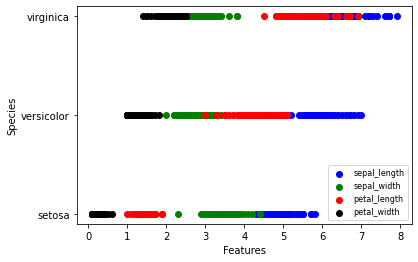

In [20]:
# Plot the relation of each feature with each species
plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

Split the data into 80% training and 20 % testing by using the method train_test_split() from the sklearn.model_selection library, and store the data into x_train, x_test, y_train, and y_test.

In [21]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
Create and train the Logistic Regression model !

In [23]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now that the model is trained, I will print the predictions and get a few metrics from the model based off of the testing data set. Based off of the metrics, it looks like the model correctly classified every species.

In [26]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [25]:
model.predict(x_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [29]:
model.predict([[5.1,4.8,4.7,3.2]])

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [28]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [11]:
model.score(x_test, y_test )

1.0